# <center>PROGRAMOWANIE DYNAMICZNE</center>

1. Metody konstrukcji algorytmów:
   - dziel i zwyciężaj (QuickSort/MergeSort) - podproblemy niezależne
   - zachłanne (algorytm Kruskala)
   - programowane dynamiczne - podproblemy zależne
      - metoda zamiany wykładniczego algorytmu rekurencyjnego na wielomianowy iteracyjny

2. Przykład elementarny - ciąg Fibbonacciego:
    - $F_0=1$
    - $F_1=1$
    - $F_n=F_{n-1}+F_{n-2}, n\geq2$

$Np.: 1,1,2,3,5,8,13,21$

Asymptotycznie obliczenie $n-tej$ liczby ciągu Fibbonacciego można przybliżyć jako: 
 - $F_n=\theta((\frac{1+\sqrt{5}}{2})^n)$

Algorytm rekurencyjny:

In [ ]:
def fib(n):
    if n<2: return 1
    return fib(n-1)+fib(n-2)

Konsekwencja zapisu rekurencyjnego:
 - wiele działań wykonujemy wielokrotnie
 - obliczanie wartości jest uzyskiwane przez wielokrotne dodawanie jedynek, co daje złożoność wykładniczą

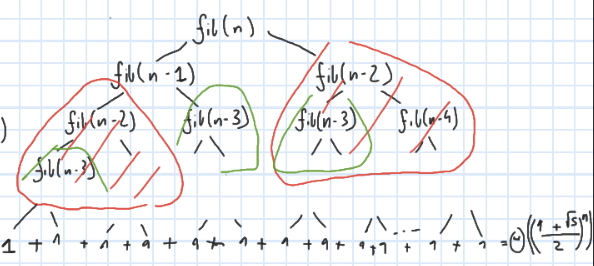

3. Obliczanie n-tej liczby Fibbonacciego algorytmem dynamicznym
    - tworzymy tablicę, w której zapamiętujemy wyniki częściowe i korzystamy z niej zamiast z rekurencji

W efekcie otrzymujemy algorytm o złożoności $O(n)$

In [ ]:
def fib(n):
    F=[1 for _ in range(n+1)]
    
    for i in range(2,n+1):
        F[i]=F[i-1]+F[i-2]
        
    return F[n]

4. Problem najdłuższego rosnącego podciągu

Dane: 
 - $A[0], ..., A[n-1]$ - tablica liczb

Zadanie: Chcemy znaleźć najdłuższy (niekoniecznie spójny) podciąg $A$

$A: [2,(1),(4),3,1,(5),2,(7),(8),3]$

Sposób rozwiązywania:
 - stworzenie funkcji, którą obliczamy
    - $\xcancel{f(i)= \text{długość najdłuższego podciągu liczb } A[0], ...,A[i]}$
 - zapisanie funkcji w postaci rekurencyjnej
 - implementacja

Uwaga $!$
 - powyższy zapis funkcji jest niezręczny i niewygodny, bo punkt drugi jest bardzo trudny do zrealizowania

Zdefiniujmy funkcję w następujący sposób:
 - $f(i)=$ długość najdługszego podciągu kończącego się na $A[i]$

Wtedy:
 - $f(0)=1$
 - $f(i)=max{\begin{cases} f(t)+1 |t<i \wedge A[t]<A[i]| \end{cases}}$

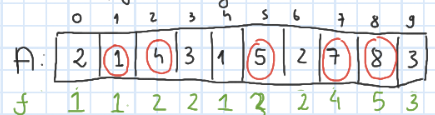

Wynikiem jest $max\{f(i)\}-$ długość najdłuższego ciągu rosnącego

In [11]:
def lis(A):
    n=len(A)
    F=[1 for _ in range(n)]
    P=[-1  for _ in range(n)]
    for i in range(1,n):
        for j in range(i):
            if A[j]<A[i] and F[j]+1>F[i]:
                P[i]=j
                F[i]=F[j]+1
    
    return F, P

A=[2,1,4,3,1,5,2,7,8,3]

def ps(A,P,i):
    if P[i]!=-1:
        ps(A,P,P[i])
    print(A[i], end=' ')
print(max(lis(A)[0]))
ps(A,lis(A)[1],8)



5
2 4 5 7 8 

5. Problem imprezy firmowej (zbiór wierzchołków niezależnych o maksymalnej sumie)

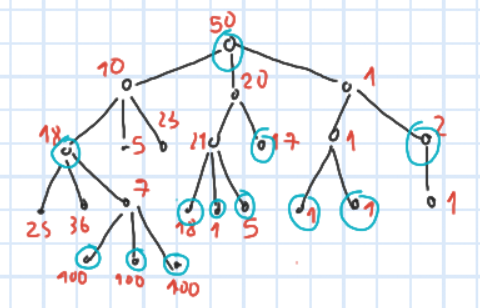

Chcemy wybrać wierzchołki o maksymalnej sumie, takie że żadne dwa nie są połączone krawędzią.

Reprezentacja drzewa:

In [ ]:
class Employee:
    def __init__(self,fun):
        self.emp=[]
        self.fun=fun
        self.f=-1
        self.g=-1

Plan działania:
 - określenie funkcji $(f,g)$, które będziemy obliczać
    - jeśli $v-$ węzeł drzewa, to:
        - $f(v)=$ wartość najlepszej imprezy w poddrzewie zakorzenionym w $v$
        - $g(v)=$ wartość najlepszej imprezy w poddrzewie zakorzenionym w $v$, o ile $v$ nie idzie na tę imprezę
 - zapis rekurencyjny:
    - $f(v)=max{\begin{cases} v.fun +  \sum_{u_{i} \text{ - dziecko v}}{g(u_{i})}, & \\ g(v)  \end{cases}}$
    - $g(v)=\sum_{u_{i} \text{ - dziecko v}}{f(u_i)}$
 - implementacja

In [ ]:
def f(v):
    if v.f>=0: return v.f
    x=v.fun
    for u in v.emp:
        x+=g(u)
    y=g(v)
    v.f=max(x,y)
    return v.f

def g(v):
    if v.g>=0: return v.g
    x=0
    for u in v.emp:
        x+=f(u)
    v.g=x
    return v.g